In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.stats import norm

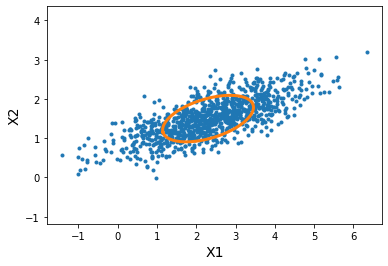

La fracción de eventos dentro de 1σ = 41.4 %. Valor cercano al téorico (39,3 %).


In [26]:
## Simulo una distribución binormal con el paquete multivariate_normal

# Medias, desviaciones estándar y correlacion
mu1 = 2.3
mu2 = 1.5
sigma1 = 1.2
sigma2 = 0.5
p = 0.7

# Simulo 1000 valores de x e y que siguen una distribución binormal
mean = (mu1, mu2)
cov = [[sigma1**2, p*sigma1*sigma2], [p*sigma1*sigma2, sigma2**2]]
x1, x2 = np.random.multivariate_normal(mean, cov, 1000).T

# Determino cuantos de los pares de valores x e y caen dentro de la elipse 1σ
q = (((x1-mu1)/sigma1)**2 + ((x2-mu2)/sigma2)**2 - 2*p*(x1-mu1)*(x2-mu2)/(sigma1*sigma2))/(1 - p**2)
dentro = sum(q <= 1)
fraccion_dentro = 100*dentro/len(q)

# Calculo valores necesarios para graficar la elipse
t = np.linspace(0, 2*np.pi, 100)
t_rot = 0.5*np.degrees(np.arctan(p*sigma1*sigma2/(sigma1**2 - sigma2**2)))

Ell = np.array([sigma1*np.cos(t) , sigma2*np.sin(t)])  
R_rot = np.array([[np.cos(t_rot) , -np.sin(t_rot)],[np.sin(t_rot) , np.cos(t_rot)]])  

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])
# https://stackoverflow.com/questions/10952060/plot-ellipse-with-matplotlib-pyplot-python

# Grafico
plt.plot(x1, x2, '.')
plt.plot(mu1 + Ell_rot[0,:] , mu2 + Ell_rot[1,:], lw = 3)
plt.axis('equal')
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)
plt.show()

print('La fracción de eventos dentro de 1σ = {} %. Valor cercano al téorico (39,3 %).'.format(fraccion_dentro))

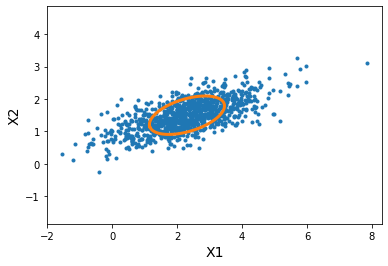

La fracción de eventos dentro de 1σ = 42.2 %. Valor cercano al téorico (39,3 %).


In [25]:
## Simulo una distribución binormal usando el producto entre la distribucion marginal y la distribución condicional

# Calculo la distribución marginal de X1
g = norm.rvs(loc = mu1, scale = sigma1, size = 1000)

# Calculo la distribución condicional de X2 dado X1
mu2_prima = mu2 + p*(g - mu1)*sigma2/sigma1
sigma2_prima = (sigma2**2)*(1 - p**2)

h2 = norm.rvs(loc = mu2_prima, scale = np.sqrt(sigma2_prima), size = 1000)

# Determino cuantos de los pares de valores x e y caen dentro de la elipse 1σ
q = (((g-mu1)/sigma1)**2 + ((h2-mu2)/sigma2)**2 - 2*p*(g-mu1)*(h2-mu2)/(sigma1*sigma2))/(1 - p**2)
dentro = sum(q <= 1)
fraccion_dentro = 100*dentro/len(q)

# Grafico
plt.plot(g, h2, '.')
plt.axis('equal')
plt.plot(mu1 + Ell_rot[0,:] , mu2 + Ell_rot[1,:], lw = 3)
plt.xlabel('X1', fontsize = 14)
plt.ylabel('X2', fontsize = 14)
plt.show()

print('La fracción de eventos dentro de 1σ = {} %. Valor cercano al téorico (39,3 %).'.format(fraccion_dentro))